# 6.5 Machine Learning Part 2

### Contents: 
##### 1. Importing libraries and data
##### 2. Data cleaning and renaming columns
##### 3. The elbow technique
##### 4. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# To have graphs displaed in notebook without calling them.
%matplotlib inline

In [3]:
path = r'C:\Users\lisad\OneDrive\Homework\Data Immersion\Achievement 6\University Rankings Project'

In [4]:
df = pd.read_excel(os.path.join(path, 'Data', 'Rankings2026_cleaned.xlsx'))

In [5]:
df.shape

(1501, 31)

In [6]:
df.head()

,Unnamed: 0,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,...,International_Student_Ratio_Rank,International_Student_Diversity_Score,International_Student_Diversity_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall SCORE
0,0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,...,153,92.3,130,94.1,98,100.0,7,93.8,33,100.0
1,1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,...,35,100.0,22,97.5,28,95.9,68,98.3,7=,99.4
2,2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,...,261,76.1,230,96.5,49,100.0,2,95.4,19=,98.9
3,3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,...,80,98.7,67,100.0,1,100.0,3,77.9,198=,97.9
4,4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,...,217,60.6,335,99.4,8,100.0,1,77.8,201=,97.7


### 2. Cleaning and renaming columns

In [7]:
# Extracting numeric values in '2026 Rank' and 'Previous Rank' columns 

# Modified lambda function to handle ranges, single values, and integers
def extract_midpoint(x):
    if isinstance(x, (int, float)):  # Check if the value is already a number
        return float(x)
    try:
        # Try to convert directly to float first
        return float(x)
    except (ValueError, TypeError):
        try:
            parts = x.split('-')
            if len(parts) == 2:  # Range like '10-20'
                return (float(parts[0]) + float(parts[1])) / 2
            elif len(parts) == 1:  # Single value like '10'
                return float(parts[0])
            else:
                return np.nan
        except (AttributeError, ValueError, TypeError):
            return np.nan

# Applying to columns
df['rank_range_midpoint'] = df['2026 Rank'].apply(extract_midpoint)
df['prevrank_range_midpoint'] = df['Previous Rank'].apply(extract_midpoint)

In [8]:
df.head()

,Unnamed: 0,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,...,International_Student_Diversity_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall SCORE,rank_range_midpoint,prevrank_range_midpoint
0,0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,...,130,94.1,98,100.0,7,93.8,33,100.0,1.0,1.0
1,1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,...,22,97.5,28,95.9,68,98.3,7=,99.4,2.0,2.0
2,2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,...,230,96.5,49,100.0,2,95.4,19=,98.9,3.0,6.0
3,3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,...,67,100.0,1,100.0,3,77.9,198=,97.9,4.0,3.0
4,4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,...,335,99.4,8,100.0,1,77.8,201=,97.7,5.0,4.0


In [9]:
df.dtypes

Unnamed: 0                                 int64
2026 Rank                                 object
Previous Rank                             object
Institution Name                          object
Country/Territory                         object
Region                                    object
Size                                      object
Focus                                     object
Research                                  object
Status                                    object
Academic_Reputation_Score                float64
Academic_Reputation_Rank                  object
Employer_Reputation_Score                float64
Employer_Reputation_Rank                  object
Faculty_Student_Ratio_Score              float64
Faculty_Student_Ratio_Rank                object
Citations_Per_Faculty_Score              float64
Citations_Per_Faculty_Rank                object
International_Faculty_Ratio_Score        float64
International_Faculty_Ratio_Rank          object
International_Studen

In [10]:
# Renaming columns
df.rename(columns = {'Academic_Reputation_Score' : 'Academic Rep Score',
                     'Employer_Reputation_Score' : 'Employer Rep Score',
                     'Faculty_Student_Ratio_Score' : 'Faculty/Student Ratio Score',
                     'Citations_Per_Faculty_Score' : 'Citations per Faculty Score',
                     'International_Faculty_Ratio_Score' : 'International Faculty Ratio Score',
                     'International_Student_Ratio_Score' : 'International Student Ratio Score',
                     'International_Student_Diversity_Score' : 'International Student Diversity Score',
                     'International_Research_Network_Score' : 'International Research Network Score',
                     'Employment_Outcomes_Score' : 'Employment Outcomes Score',
                     'Sustainability_Score' : 'Sustainability Score',
                     'rank_range_midpoint' : '2026 Rank range midpoint',
                     'prevrank_range_midpoint' : 'Previous Rank range midpoint'},
          inplace = True)
                     

In [11]:
# Creating a subset of only the numeric columns
df_2 = df[['2026 Rank range midpoint', 'Previous Rank range midpoint', 'Academic Rep Score', 'Employer Rep Score', 'Citations per Faculty Score', 'International Faculty Ratio Score', 'International Student Ratio Score', 'International Student Diversity Score', 'International Research Network Score', 'Employment Outcomes Score', 'Sustainability Score']]

In [12]:
df_2.head()

,2026 Rank range midpoint,Previous Rank range midpoint,Academic Rep Score,Employer Rep Score,Citations per Faculty Score,International Faculty Ratio Score,International Student Ratio Score,International Student Diversity Score,International Research Network Score,Employment Outcomes Score,Sustainability Score
0,1.0,1.0,100.0,100.0,100.0,100.0,91.6,92.3,94.1,100.0,93.8
1,2.0,2.0,99.6,100.0,95.0,100.0,100.0,100.0,97.5,95.9,98.3
2,3.0,6.0,100.0,100.0,99.7,94.2,73.5,76.1,96.5,100.0,95.4
3,4.0,3.0,100.0,100.0,91.0,98.8,98.6,98.7,100.0,100.0,77.9
4,5.0,4.0,100.0,100.0,100.0,79.1,81.4,60.6,99.4,100.0,77.8


In [13]:
# Removing NaN values
df_ready = df_2.dropna()

In [14]:
# Standardizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_ready)

df_scaled = pd.DataFrame(df_scaled, columns=df_ready.columns)

### 3. The elbow technique

In [15]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [16]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

score

[-13607.000000000004,
 -7918.148390551402,
 -6499.178485735207,
 -5452.269594977485,
 -4937.120879193162,
 -4506.9619605346,
 -4267.248043555581,
 -3999.6386914827563,
 -3722.695355966097]

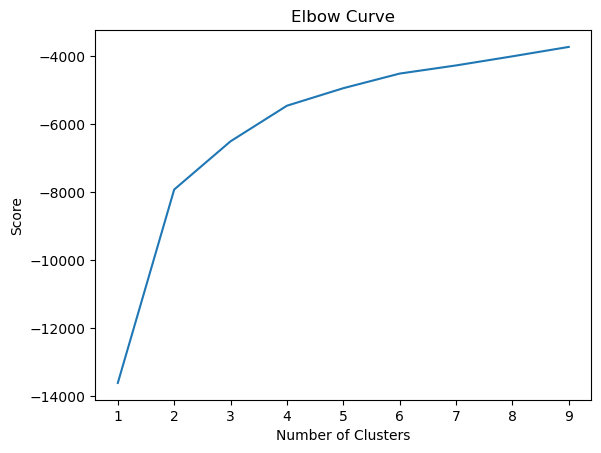

In [17]:
# Plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The degree of curve decreases after 4, so I will go with 4 clusters.

### 4. k-means clustering

In [18]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [19]:
# Fit the k-means object onto the data.
kmeans.fit(df_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [20]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [21]:
df_scaled.head()

,2026 Rank range midpoint,Previous Rank range midpoint,Academic Rep Score,Employer Rep Score,Citations per Faculty Score,International Faculty Ratio Score,International Student Ratio Score,International Student Diversity Score,International Research Network Score,Employment Outcomes Score,Sustainability Score,clusters
0,-1.646763,-1.673067,2.772864,2.626874,2.184802,1.724333,1.678194,1.742012,1.316829,2.235798,1.901393,0
1,-1.644256,-1.670495,2.757256,2.626874,2.019590,1.724333,1.931702,1.985848,1.441117,2.098695,2.122266,0
2,-1.641750,-1.660208,2.772864,2.626874,2.174890,1.561320,1.131945,1.229008,1.404562,2.235798,1.979926,0
3,-1.639243,-1.667924,2.772864,2.626874,1.887421,1.690606,1.889451,1.944681,1.532506,2.235798,1.120977,0
4,-1.636736,-1.665352,2.772864,2.626874,2.184802,1.136923,1.370363,0.738170,1.510572,2.235798,1.116068,0


In [22]:
df_scaled['clusters'].value_counts()

clusters
1    430
2    353
0    258
3    196
Name: count, dtype: int64

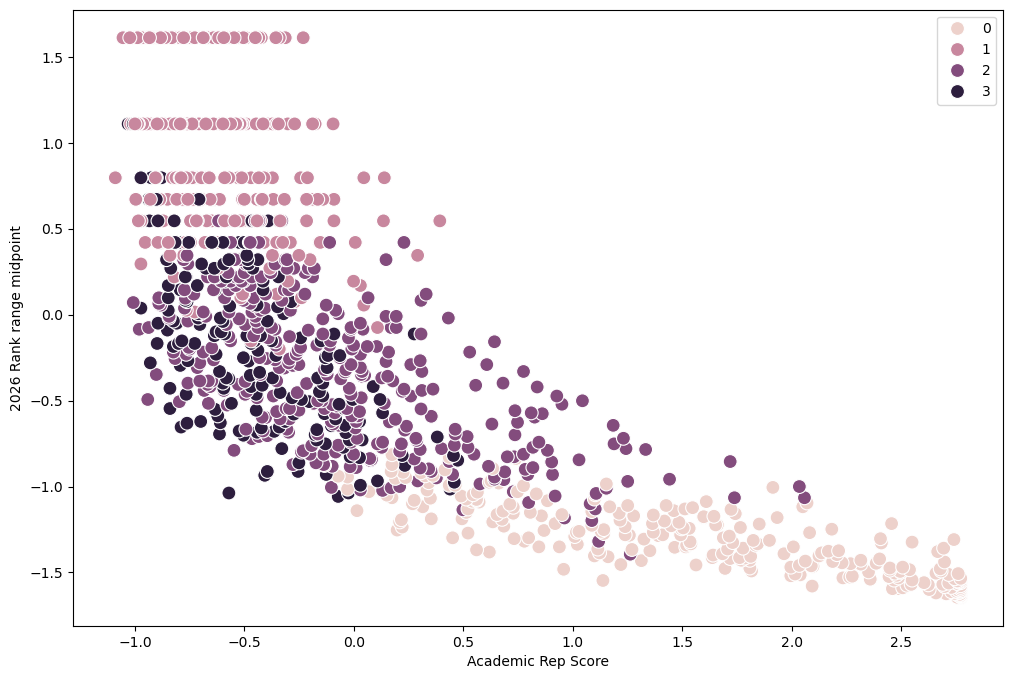

In [23]:
# Plot the clusters for '2026 Rank range midpoint' and 'Academic Rep Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Academic Rep Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Academic Rep Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [24]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_rep_clusters.png'))

##### The standardization makes the numbers on axes confusing, but looking just at the shape of the cluster, I can see that there is a concentration of higher (further from #1) ranked institutions with lower academic reputation scores, and the very highest academic reputations scores are concentrated closer to #1 in the rankings. the 'middle' two clusters overlap quite a bit. 

<Figure size 640x480 with 0 Axes>

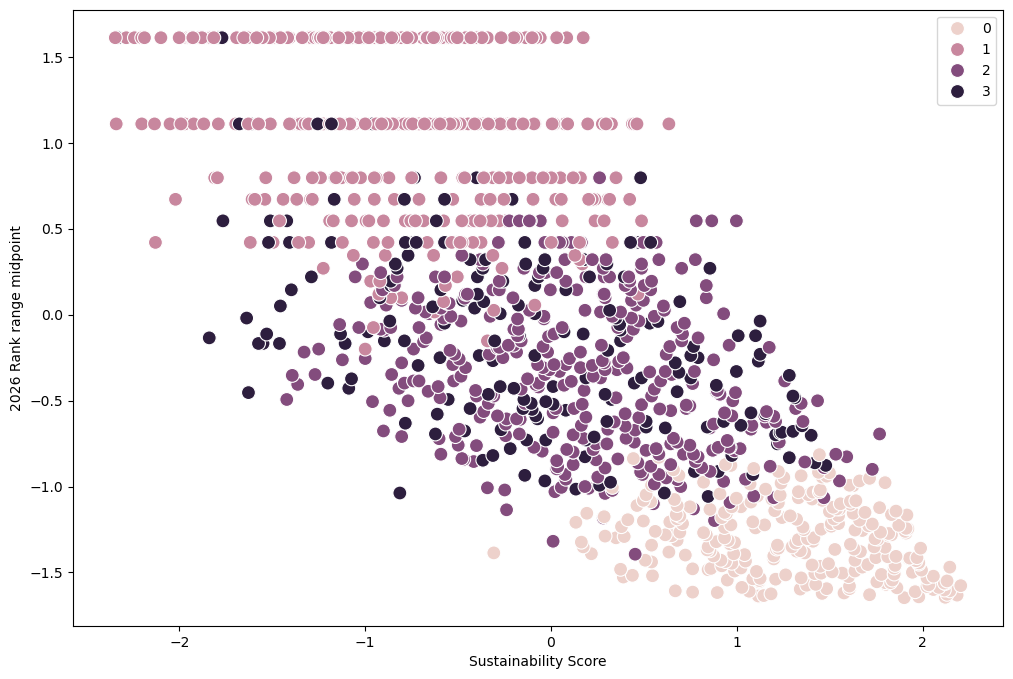

In [25]:
# Plot the clusters for '2026 Rank range midpoint' and 'Sustainability Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Sustainability Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Sustainability Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [26]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_sus_clusters.png'))

##### Here we see a correlation between high sustainability scores and low (closer to #1) and otherwise a lot of overlap.

<Figure size 640x480 with 0 Axes>

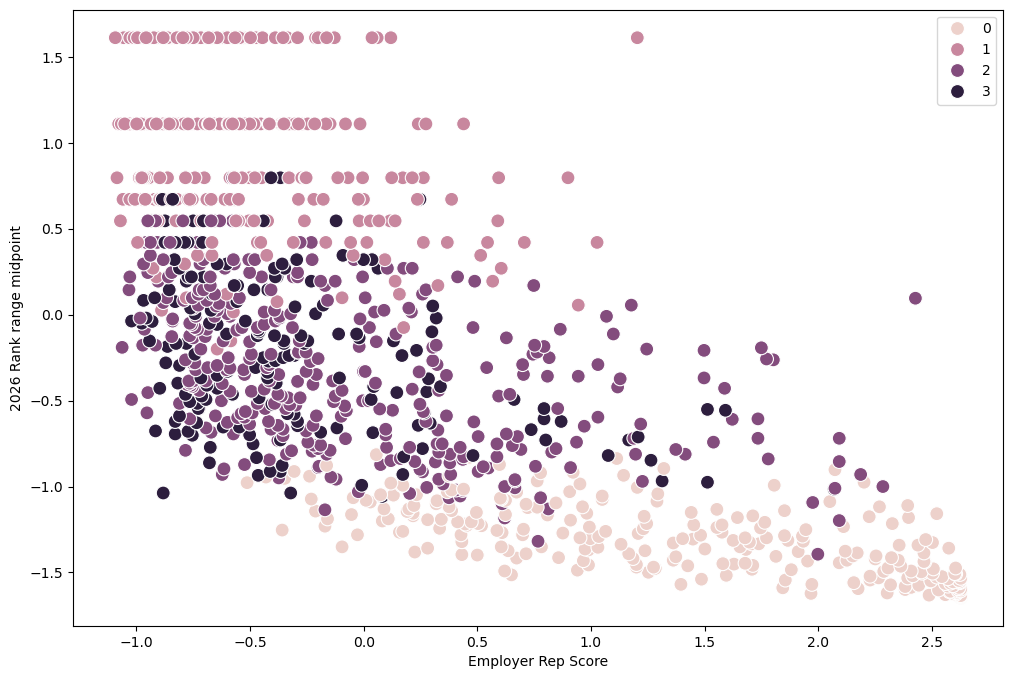

In [27]:
# Plot the clusters for '2026 Rank range midpoint' and 'Employer Rep Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Employer Rep Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Employer Rep Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [28]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_employerrep_clusters.png'))

##### Another similar pattern to the that which we saw in the previous 2 visualizations. 

<Figure size 640x480 with 0 Axes>

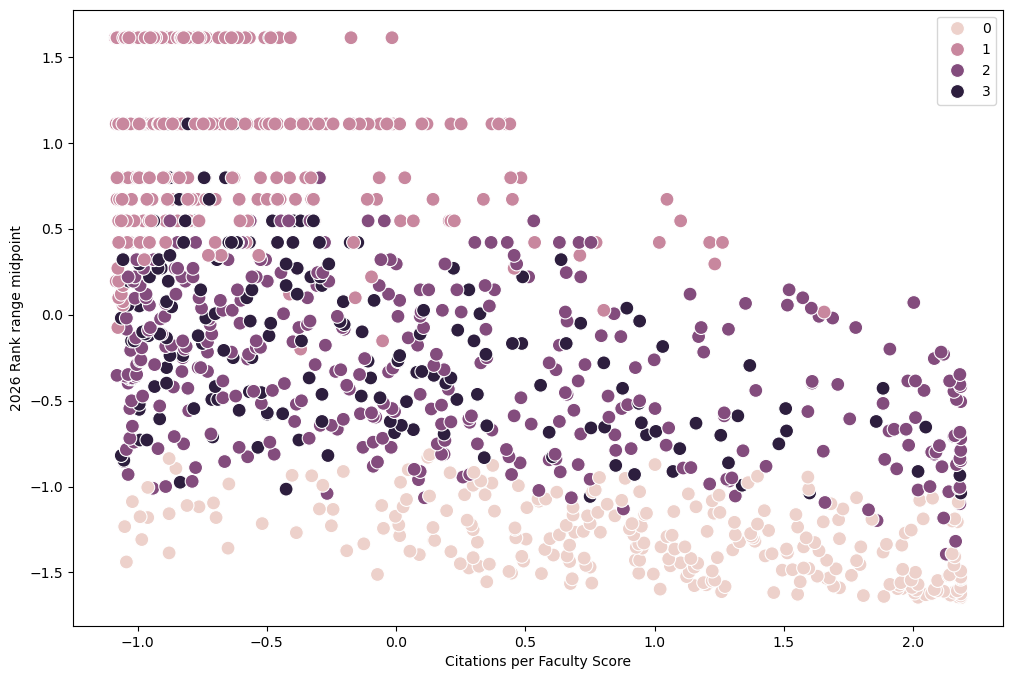

In [29]:
# Plot the clusters for 'Citations per Faculty Score' and 'Sustainability Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Citations per Faculty Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Citations per Faculty Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [30]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_citations_clusters.png'))

##### When we look at Citations per Faculty, we see that the top rated institutions have a wide range of scores in this area. 

<Figure size 640x480 with 0 Axes>

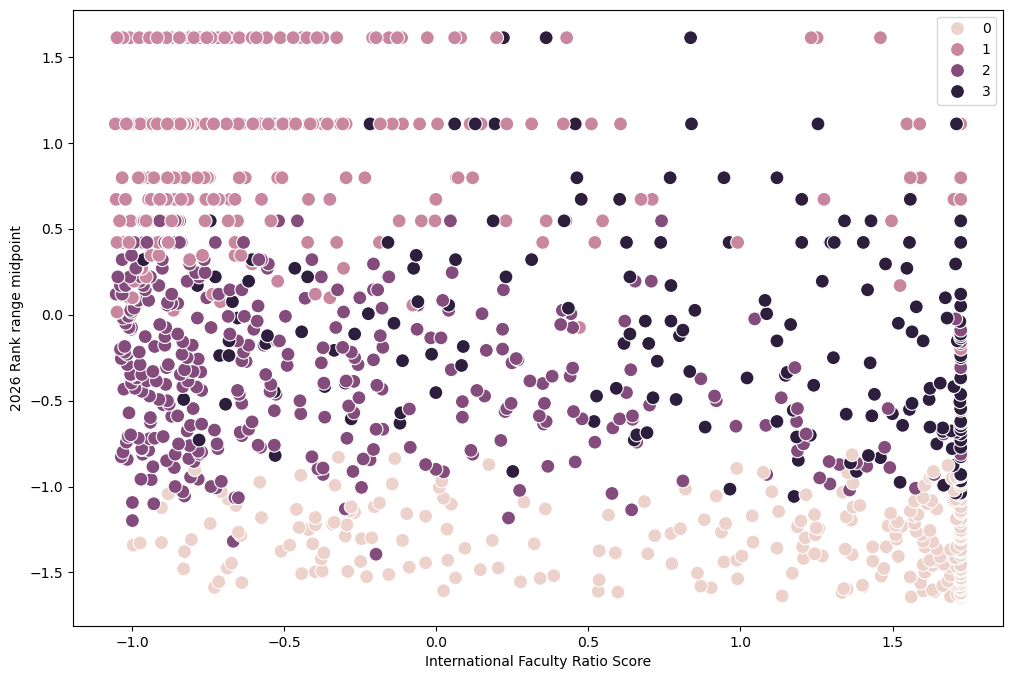

In [31]:
# Plot the clusters for '2026 Rank range midpoint' and 'International Faculty Ratio Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['International Faculty Ratio Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('International Faculty Ratio Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [32]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_intlfac_clusters.png'))

##### Not much of a correlation is reflected here. 

<Figure size 640x480 with 0 Axes>

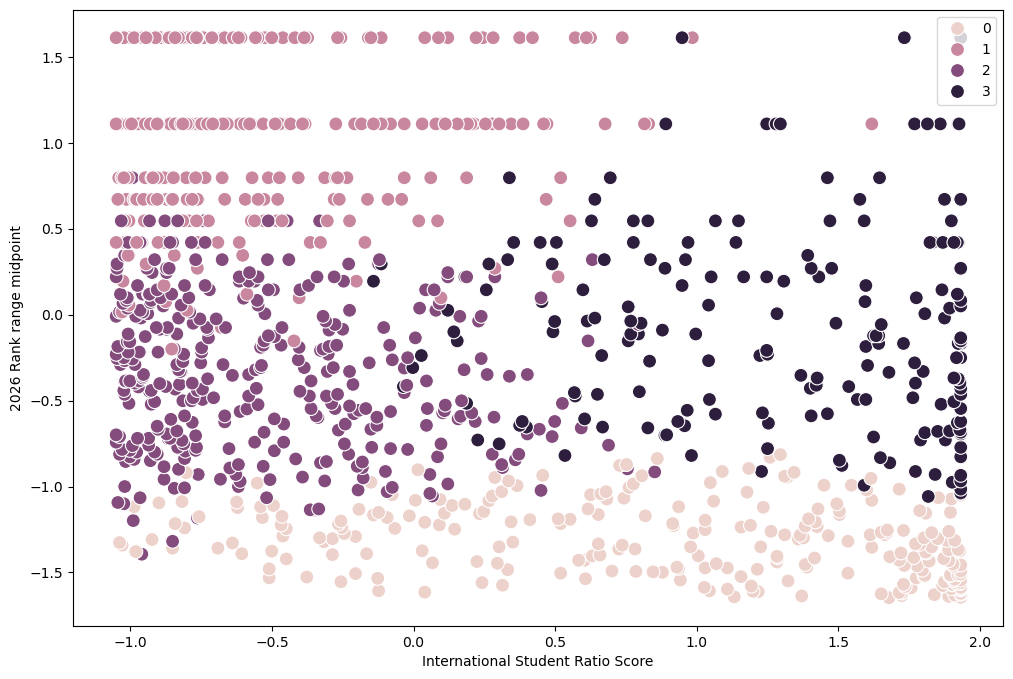

In [33]:
# Plot the clusters for '2026 Rank range midpoint' and 'International Student Ratio Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['International Student Ratio Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('International Student Ratio Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [34]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_intlstudent_clusters.png'))

##### Similar to the above.

<Figure size 640x480 with 0 Axes>

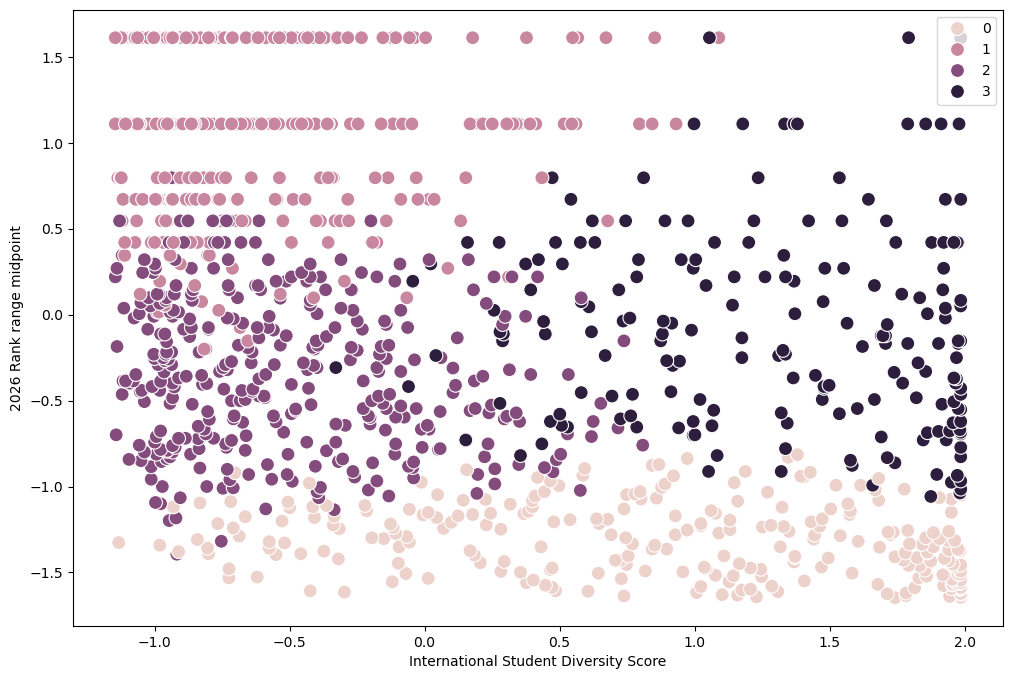

In [35]:
# Plot the clusters for '2026 Rank range midpoint' and 'International Student Diversity Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['International Student Diversity Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('International Student Diversity Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [36]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_intlstudiv_clusters.png'))

##### Another similar visual. 

<Figure size 640x480 with 0 Axes>

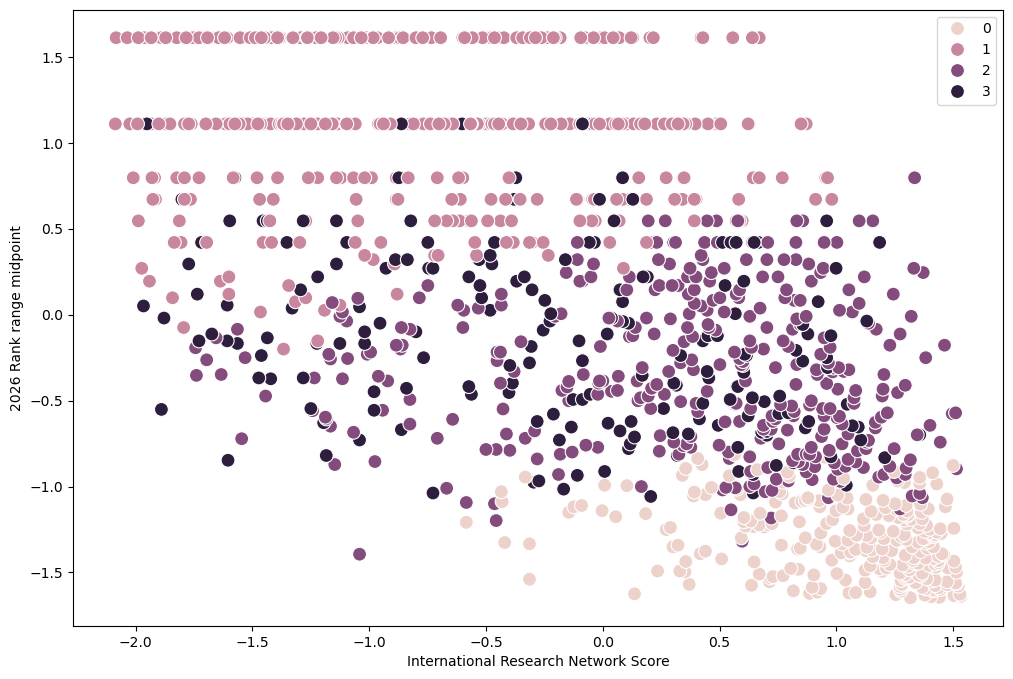

In [37]:
# Plot the clusters for '2026 Rank range midpoint' and 'International Research Network Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['International Research Network Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('International Research Network Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [38]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_intlresearch_clusters.png'))

##### Here we see a concentration of high International REsearch Network Scores associated with the rankings closest to #1. 

<Figure size 640x480 with 0 Axes>

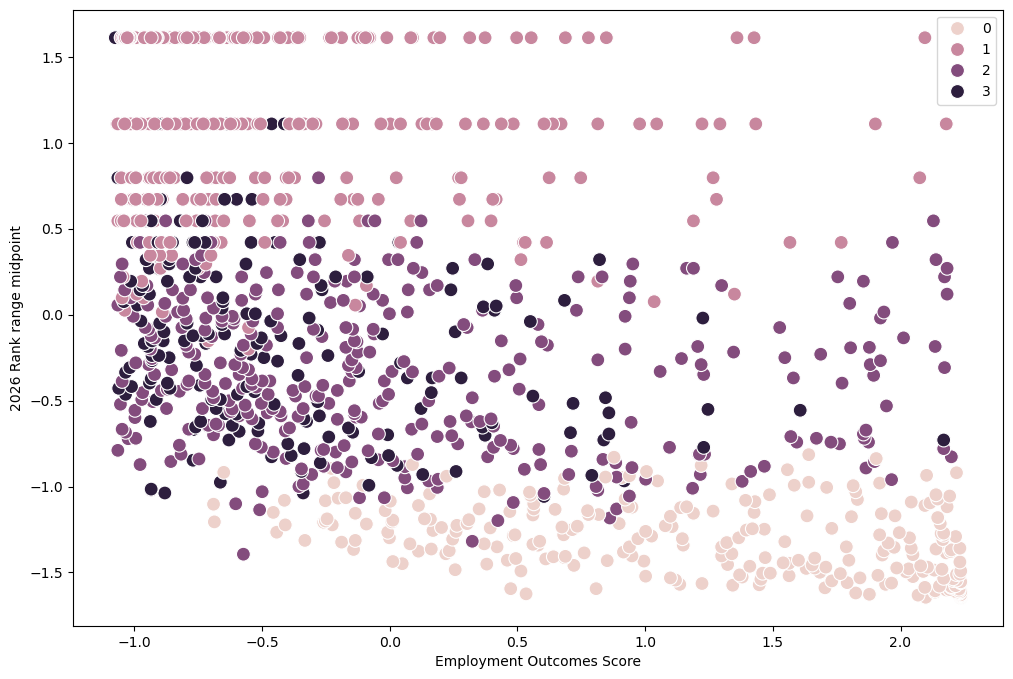

In [39]:
# Plot the clusters for '2026 Rank range midpoint' and 'Employment Outcomes Score' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Employment Outcomes Score'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Employment Outcomes Score')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [40]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_employment_outcomes_clusters.png'))

##### The above shows a concentration of high employment outcome scores associated with the best ranking institutions and a high number of lower employment outcome scores in all 3 other clusters. 

<Figure size 640x480 with 0 Axes>

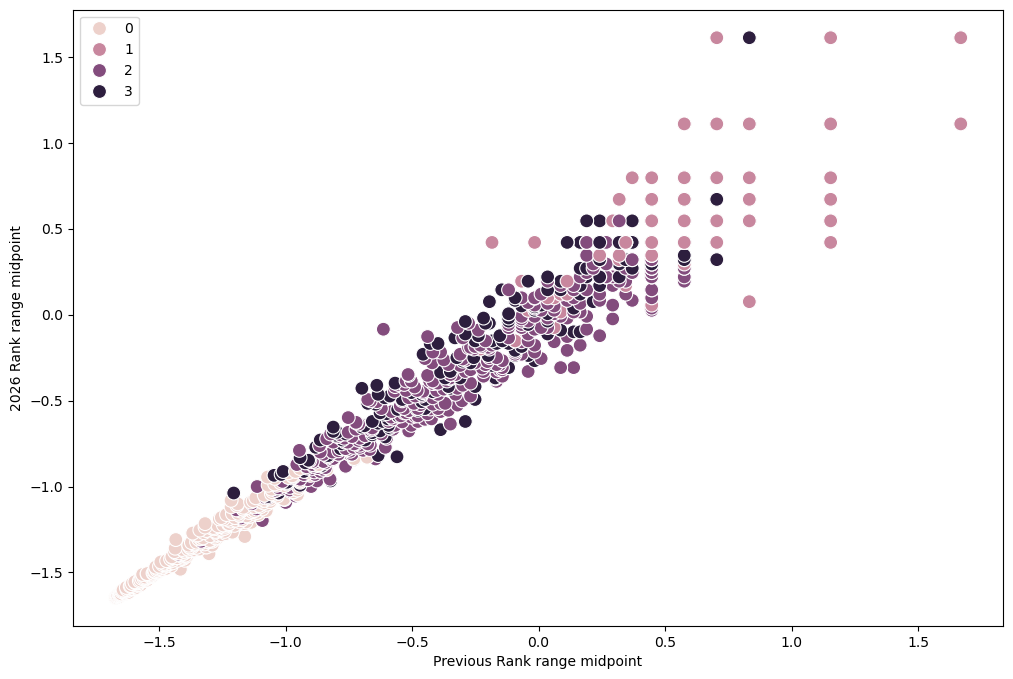

In [41]:
# Plot the clusters for '2026 Rank range midpoint' and 'Previous Rank range midpoint' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Previous Rank range midpoint'], y=df_scaled['2026 Rank range midpoint'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Previous Rank range midpoint')
plt.ylabel('2026 Rank range midpoint')
plt.show()

In [42]:
plt.savefig(os.path.join(path, 'Visualizations', 'rank_prevrank_clusters.png'))

##### Not surprisingly, the closest correlation to this year's rank is last year's rank. 

#### Taken all together, the above visualizations above seem to support my hypothesis that "The institutions that rank the best will have high scores in all measures." 

In [43]:
# Calculating descriptive statistics of clusters

df_scaled.loc[df_scaled['clusters'] == 0, 'cluster'] = 'pink'
df_scaled.loc[df_scaled['clusters'] == 1, 'cluster'] = 'light purple'
df_scaled.loc[df_scaled['clusters'] == 2, 'cluster'] = 'medium purple'
df_scaled.loc[df_scaled['clusters'] == 3, 'cluster'] = 'dark purple'

In [44]:
df_scaled.groupby('cluster').agg({'2026 Rank range midpoint':['mean', 'median'],
                                  'Previous Rank range midpoint':['mean', 'median'],
                                  'Academic Rep Score':['mean', 'median'],
                                  'Employer Rep Score':['mean', 'median'],
                                  'Citations per Faculty Score':['mean', 'median'],
                                  'International Faculty Ratio Score':['mean', 'median'],
                                  'International Student Ratio Score':['mean', 'median'],
                                  'International Student Diversity Score':['mean', 'median'],
                                  'International Research Network Score':['mean', 'median'],
                                  'Employment Outcomes Score':['mean', 'median'],
                                  'Sustainability Score':['mean', 'median']})

2026 Rank range midpoint           Previous Rank range midpoint  \
                                  mean    median                         mean   
cluster                                                                         
dark purple                  -0.089228 -0.152704                    -0.125773   
light purple                  1.103835  1.109476                     1.097249   
medium purple                -0.338485 -0.353249                    -0.300387   
pink                         -1.308820 -1.319624                    -1.322205   

                        Academic Rep Score           Employer Rep Score  \
                 median               mean    median               mean   
cluster                                                                   
dark purple   -0.168562          -0.487644 -0.541914          -0.374519   
light purple   1.154631          -0.675854 -0.735065          -0.628641   
medium purple -0.348589          -0.056465 -0.141956          -0.041791   
pink          -1.334875           1.574138  1.604205           1.389432   

                        Citations per Faculty Score            ...  \
                 median                        mean    median  ...   
cluster                                                        ...   
dark purple   -0.494267                   -0.187271 -0.425547  ...   
light purple  -0.750284                   -0.692914 -0.831969  ...   
medium purple -0.234486                    0.238923  0.046959  ...   
pink           1.414561                    0.970225  1.036579  ...   

              International Student Ratio Score            \
                                           mean    median   
cluster                                                     
dark purple                            1.276591  1.423178   
light purple                          -0.681364 -0.850847   
medium purple                         -0.525430 -0.648644   
pink                                   0.884696  1.053479   

              International Student Diversity Score            \
                                               mean    median   
cluster                                                         
dark purple                                1.289708  1.368342   
light purple                              -0.690385 -0.837260   
medium purple                             -0.513482 -0.620342   
pink                                       0.873417  1.015256   

              International Research Network Score            \
                                              mean    median   
cluster                                                        
dark purple                              -0.236099 -0.130760   
light purple                             -0.803811 -0.872832   
medium purple                             0.369157  0.538202   
pink                                      1.013959  1.154158   

              Employment Outcomes Score           Sustainability Score  \
                                   mean    median                 mean   
cluster                                                                  
dark purple                   -0.431924 -0.633330            -0.155276   
light purple                  -0.566987 -0.800528            -0.818548   
medium purple                  0.048291 -0.168518             0.145216   
pink                           1.207034  1.341285             1.283521   

                         
                 median  
cluster                  
dark purple   -0.147814  
light purple  -0.776074  
medium purple  0.163862  
pink           1.336941  

[4 rows x 22 columns]

#### I don't draw any new insights from specifically looking at the descriptive statistics. The overlap among the clusters when looking at so many of the variables is much more clearly seen in the scatterplots than by looking at the numbers. 

### Next steps will be to look at if and how the categorical variables like size and status (public/private for profit/private not for profit) correlate to ranking. Combining those insights with the ones gleaned here today and when looking at the geographical information considered previously, I believe will confirm my new hypotheses: 
#### No one factor determines an institutions ranking.
#### The institutions ranked among the best universities worldwide have high scores in a variety of measures. 